<a href="https://colab.research.google.com/github/koel1-prog/Fake-News-Detection/blob/main/FakeNewsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset columns:

1. Title: title of news article
2. Text: body text of news article
3. Subject: subject of news article
4. Date: publish date of news article

In [36]:
# Import Required Libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [37]:
# Download NLTK stopwords (only needed the first time)
import nltk
nltk.download('stopwords')

# Initialize stopword list and Porter Stemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
## Data Preprocessing

# Load the Fake and True news datasets from compressed CSV files
df_fake = pd.read_csv("/content/Fake.csv.zip")
df_true = pd.read_csv("/content/True.csv.zip")
# Add label columns: 0 = fake, 1 = real
df_fake["label"] = 0
df_true["label"] = 1
# Combine the datasets into one
news_dataset = pd.concat([df_fake,df_true], ignore_index='True')
# Drop rows with any missing values
news_dataset= news_dataset.sample(frac=1,random_state=42).reset_index(drop=True)
news_dataset.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [39]:
# Keep only the 'text' and 'label' columns
news_dataset = news_dataset[['text','label']].copy()
# Drop rows with any missing values
news_dataset.dropna(inplace=True)
news_dataset.head()

,text,label
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


In [40]:
## Text Preprocessing

# Drop rows with any missing values
news_dataset.dropna(inplace=True)

def clean_text(text):
  # Convert text to lowercase
  text=text.lower()
  # Remove all non-letter characters (e.g., numbers, punctuation)
  text=re.sub('[^a-zA-Z]', ' ', text)
  # Tokenize the text (split into words)
  words=text.split()
  # Remove stopwords and apply stemming
  words=[ps.stem(word) for word in words if word not in stop_words]
  # Join words back into a single string
  return ' '.join(words)

# Apply the text cleaning function to the dataset
news_dataset['text']=news_dataset['text'].apply(clean_text)
news_dataset.head()

,text,label
0,st centuri wire say ben stein reput professor ...,0
1,washington reuter u presid donald trump remov ...,1
2,reuter puerto rico governor ricardo rossello s...,1
3,monday donald trump embarrass countri accident...,0
4,glasgow scotland reuter u presidenti candid go...,1


In [41]:
# Split data
X = news_dataset['text']
y = news_dataset['label']

# 80% training, 20% testing, preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [27]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [29]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# Evaluate the Model
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", accuracy)
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9857461024498887
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



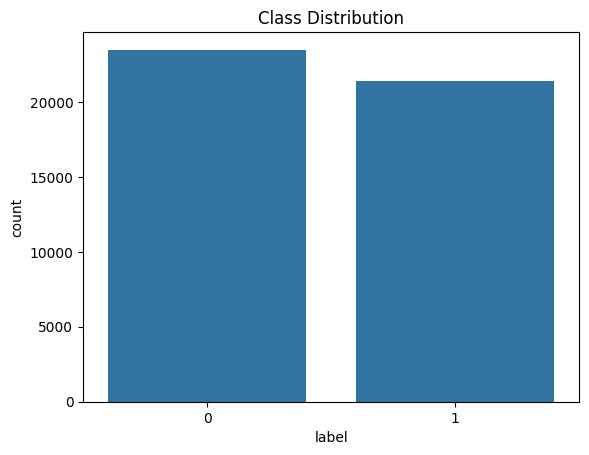

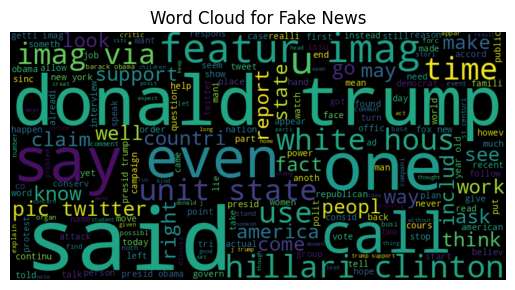

In [42]:
# Data visualization + EDA
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Class distribution
sns.countplot(x='label', data=news_dataset)
plt.title('Class Distribution')
plt.show()

# Wordcloud for Fake News
fake_text = ' '.join(news_dataset[news_dataset['label'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400).generate(fake_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()
